# Torch & Folktables 

In the previous notebooks we visualized a bunch of pareto curves for adult and folktables dataset using scipy optimize routine. Here we transition to using pytorch. In the beginning we will mimic some of the conducted experiments to make sure all still works fine, and then move to more advanced experiments. 

In [1]:
import json 

def get_exp_results(exp_name): 
    """
    Loads json with experimental results
    """
    path = f"experiments/results/{exp_name}.json"
    with open(path, 'r') as openfile:
            results = json.load(openfile)
    return results

In [2]:
import pandas as pd
def print_exp_info(exp_name, show_results=True):
    info = get_exp_results(exp_name)
    for k, v in info.items():
        if isinstance(v, str):
            print(f"{k}:::{v[:100]}")
        elif isinstance(v, list):
            if show_results:
                for i, elem in enumerate(v):
                    print(f"{k}#{i}:::{elem[:50]}")
        else:
            print(f"{k}:::{v}")
                  

In [3]:
import matplotlib.pyplot as plt

def visualize_2d_results(exp_name, labels=["accuracy", "fairness"], inv=True,
                        ignore_first=True):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]
    if inv:
        result = result[::-1]
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(result[0], result[1], label = "Pareto Curve", color = 'purple')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()
    

In [4]:
import matplotlib.tri as tri

ORDERS = [(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

def visualize_3d_results(exp_name, 
                         labels=["accuracy", "robustness", "fairness"],
                         ignore_first=True, mode='3D'):
    info = get_exp_results(exp_name)
    result = info["result"]
    if ignore_first:
        for i in range(len(result)):
            result[i] = result[i][1:]

    fig = plt.figure(figsize = (10, 14))
    for i in range(len(ORDERS)):
        order = ORDERS[i]
        x = result[order[0]]
        y = result[order[1]]
        z = result[order[2]]
        if mode == "3D":
            ax1 = fig.add_subplot(3, 2, 1 + i, projection='3d', label = "Pareto Plane")
            ax1.scatter(x, y, z)
            ax1.set_zlabel(labels[order[2]])
        else:
            ax1 = fig.add_subplot(3, 2, 1 + i, label = "Countur Levels")
            ax1.tricontourf(x, y, z)
            ax1.set_title(f"Countur plot for {labels[order[2]]}")
            triang = tri.Triangulation(x, y)
            tcf = ax1.tricontourf(triang, z)
            fig.colorbar(tcf)
        ax1.set_xlabel(labels[order[0]])
        ax1.set_ylabel(labels[order[1]])
        
    plt.show()

In [5]:
from experiments.exp_tools import aggregate_result

In [6]:
def collect_exp_results(exp_name, task_num):
    aggregate_result(f"experiments/results/raw_results/{exp_name}/", f"experiments/results/{exp_name}.json", task_num)

In [7]:
def compare_experiments_2d(fst_exp_name, snd_exp_name, dataset_labels = ["adult", "folktables"],
                        labels=["accuracy", "fairness"], inv=True,
                        ignore_first=True):
    results = []
    for exp_name in (fst_exp_name, snd_exp_name):
        info = get_exp_results(exp_name)
        result = info["result"]
        if ignore_first:
            for i in range(len(result)):
                result[i] = result[i][1:]
        if inv:
            result = result[::-1]
        results.append(result)
    if inv:
        labels = labels[::-1]
    fig = plt.figure(figsize = (10, 8))
    plt.plot(results[0][0], results[0][1], label = dataset_labels[0], color = 'purple')
    plt.plot(results[1][0], results[1][1], label = dataset_labels[1], color = 'orange')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.legend()
    plt.show()

## Experiment 30 (Group Fairness vs Acc)

In [18]:
print_exp_info("exp30")

name:::exp30
descr:::torch acc vs group fairness
result#0:::['0.575866', '0.76626915', '0.7684271', '0.77052814', '0.7736513', '0.7767177', '0.77830774', '0.78001136', '0.7792732', '0.78091997']
result#1:::['0.8891844732811357', '0.9999117155831195', '0.9994826768227295', '0.9986718119442414', '0.9974733273649606', '0.9958487273593811', '0.9939849062338899', '0.9918771657438731', '0.9888637920013492', '0.9834293136604989']


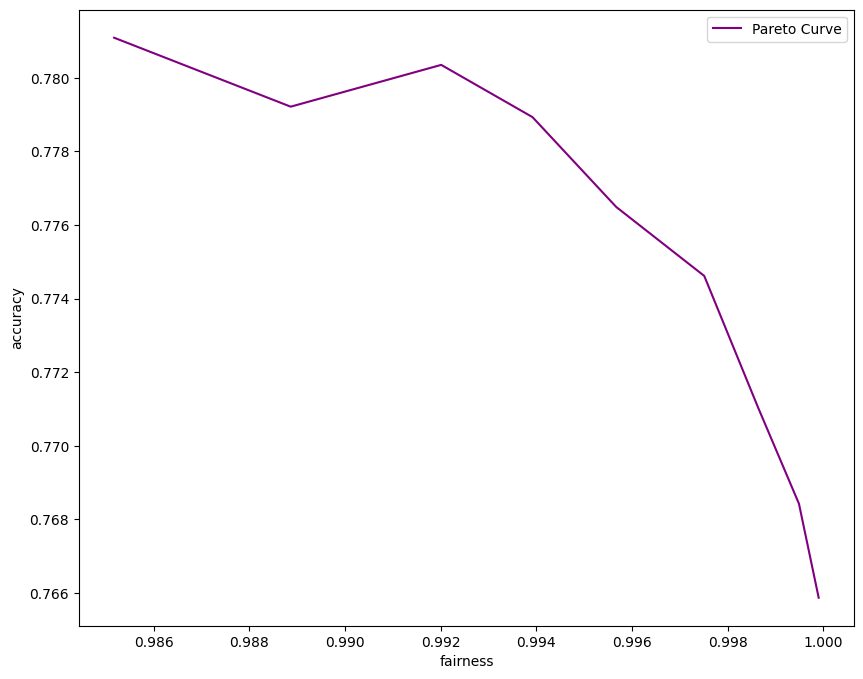

In [26]:
visualize_2d_results("exp30")

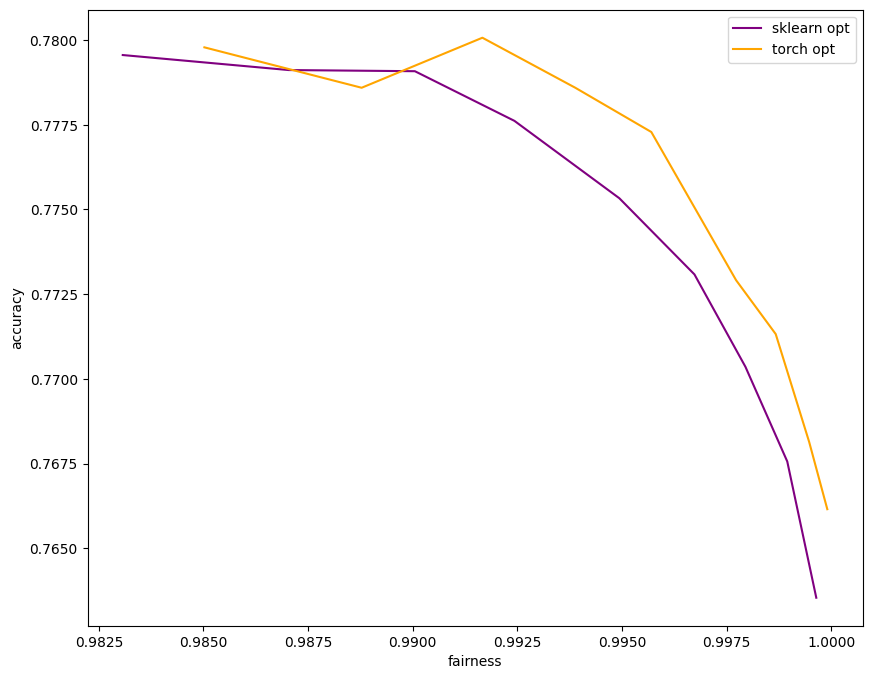

In [30]:
compare_experiments_2d("exp11", "exp30", dataset_labels = ["sklearn opt", "torch opt"])

## Experiment 31 (ind fairness vs acc)

In [31]:
print_exp_info("exp31")

name:::exp31
descr:::torch acc vs ind fairness
result#0:::[0.4382169246673584, 0.7520158886909485, 0.7773423790931702, 0.7793299555778503, 0.7793866991996765, 0.7806360125541687, 0.7800113558769226, 0.7808063626289368, 0.7798977494239807, 0.7800113558769226]
result#1:::[0.7700192332267761, 0.850386917591095, 0.8266523480415344, 0.8186003565788269, 0.8135573863983154, 0.811628520488739, 0.8094634413719177, 0.8078200221061707, 0.8065240979194641, 0.8049659729003906]


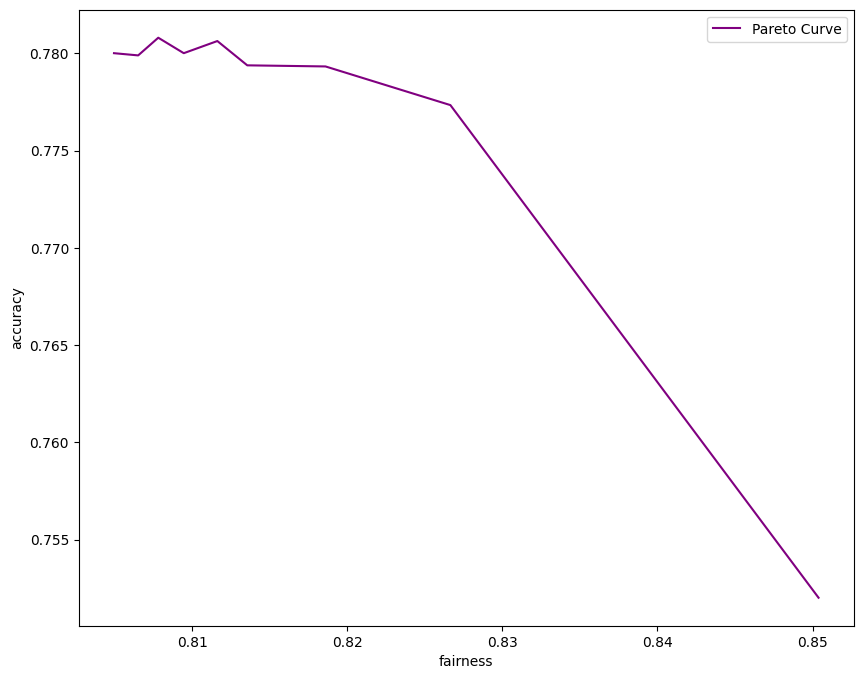

In [32]:
visualize_2d_results("exp31")

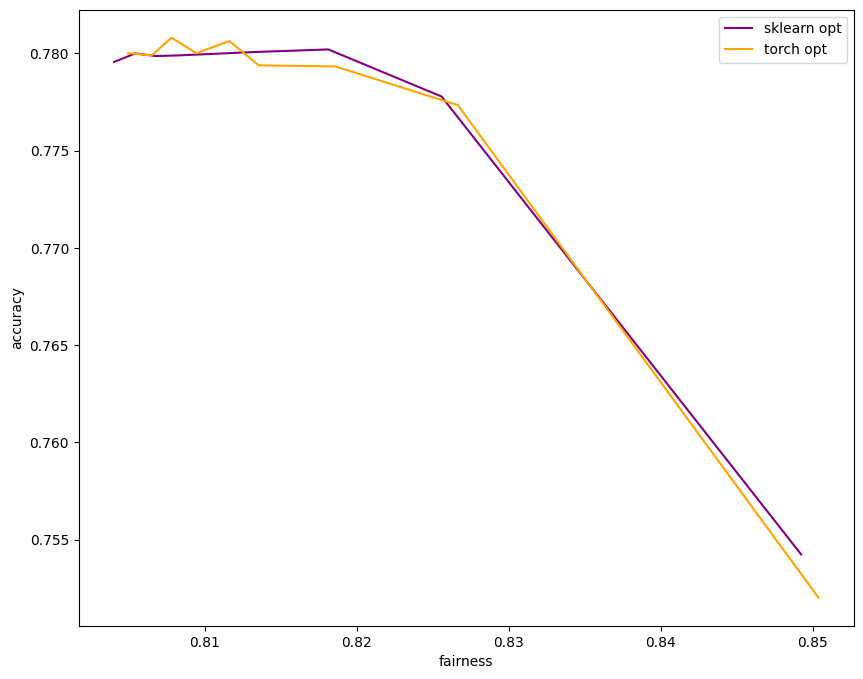

In [34]:
compare_experiments_2d("exp12", "exp31", dataset_labels = ["sklearn opt", "torch opt"])

## Experiment 32 (adv robustness vs acc)

In [35]:
print_exp_info("exp32")

name:::exp31
descr:::torch acc vs adv robustness
result#0:::[0.7774786949157715, 0.777614951133728, 0.7777513265609741, 0.7771379947662354, 0.778739333152771, 0.7778875231742859, 0.7784668207168579, 0.7789096832275391, 0.7786030173301697, 0.7784667611122131, 0.7795230150222778, 0.7778194546699524]
result#1:::[0.3976967930793762, 0.3992921710014343, 0.4011597871780396, 0.40300368070602416, 0.40416382551193236, 0.4059458255767822, 0.40738099813461304, 0.4078438520431519, 0.40922032594680785, 0.409352970123291, 0.4112480640411377, 0.41203171014785767]


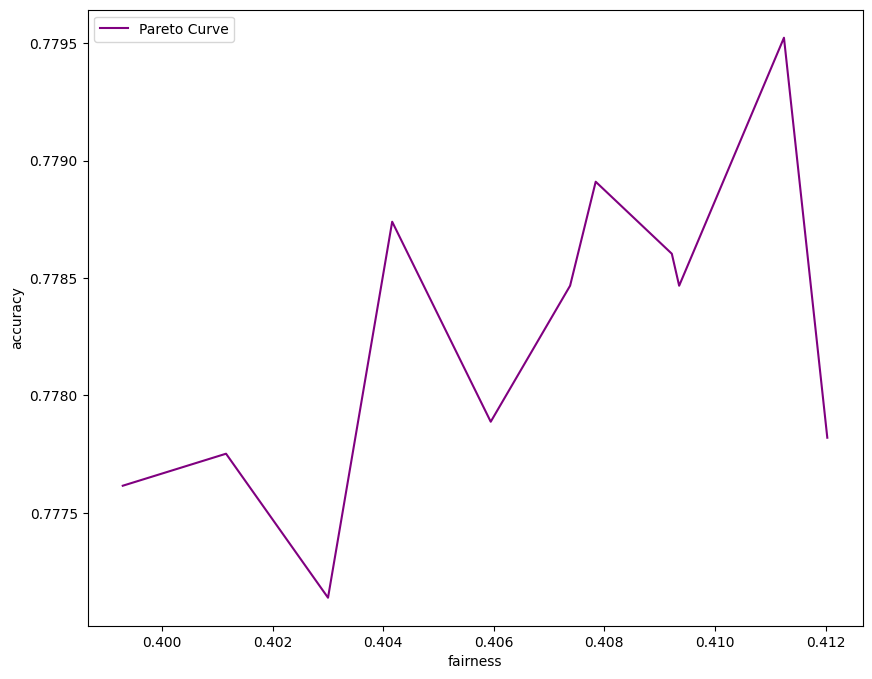

In [36]:
visualize_2d_results("exp32") # 1000 iterations of optimization

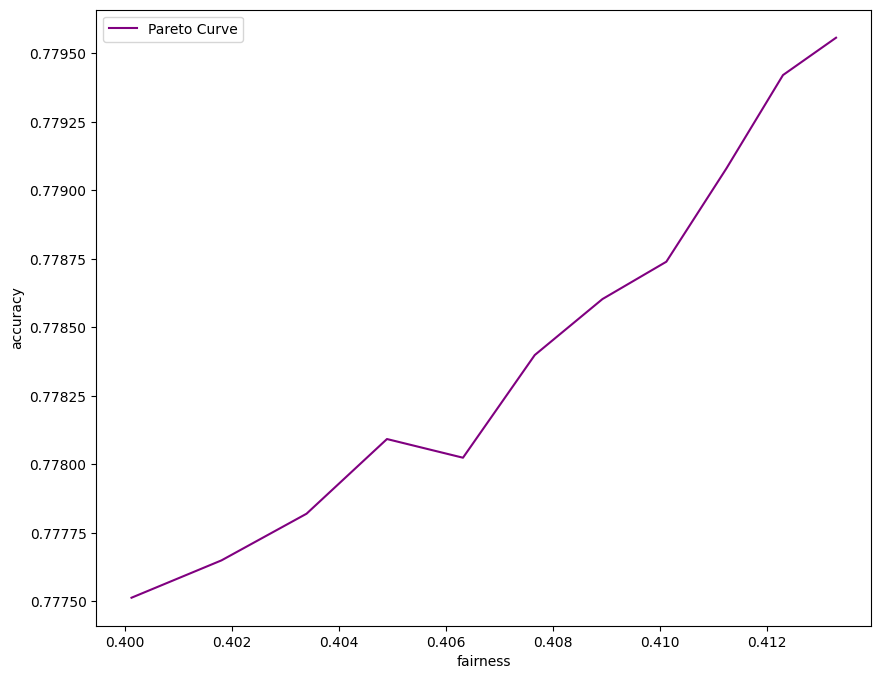

In [38]:
visualize_2d_results("exp32") # 3000 iterations of optimization

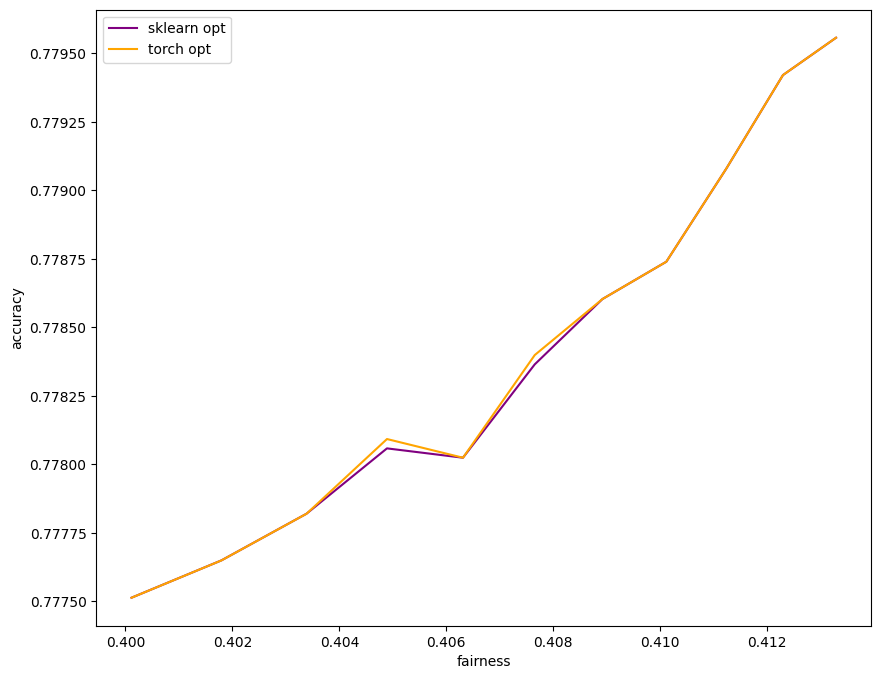

In [39]:
compare_experiments_2d("exp26", "exp32", dataset_labels = ["sklearn opt", "torch opt"])

## Experiment 35 (acc vs pairwise robustness)

In [11]:
print_exp_info("exp35")

name:::exp35
descr:::torch acc vs consistent robustness 1000 epochs 4096 batch size
result#0:::[0.5926746129989624, 0.77257239818573, 0.7735945582389832, 0.777512788772583, 0.7800681591033936, 0.7792163491249084, 0.7792163491249084, 0.7800681591033936, 0.7800681591033936, 0.7805792093276978]
result#1:::[0.0, 0.43414539098739624, 0.42536062002182007, 0.42162972688674927, 0.4163883924484253, 0.4133276343345642, 0.41094833612442017, 0.40828508138656616, 0.40704143047332764, 0.40487223863601685]


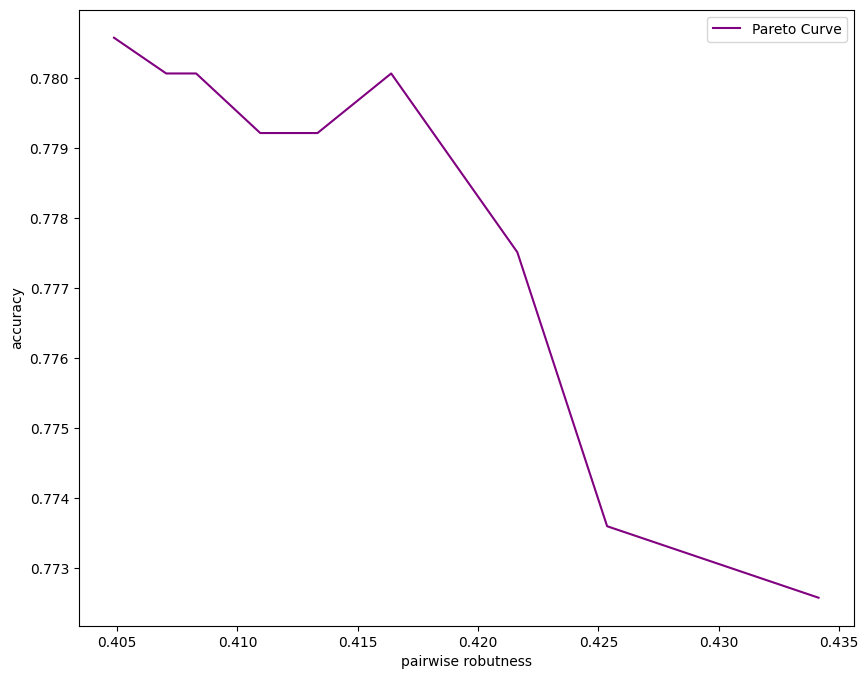

In [14]:
visualize_2d_results("exp35",  labels=["accuracy", "pairwise robutness"]) 

## Experiment 36 (acc vs pairwise robustness 250 iter)

In [15]:
print_exp_info("exp36")

name:::exp35
descr:::torch acc vs consistent robustness 250 epochs 4096 batch size
result#0:::[0.5926746129989624, 0.77257239818573, 0.7737649083137512, 0.7776831388473511, 0.7795570492744446, 0.7792163491249084, 0.7790459990501404, 0.7800681591033936, 0.7804088592529297, 0.7805792093276978]
result#1:::[0.0, 0.4326632618904114, 0.4258432984352112, 0.4215956926345825, 0.41666096448898315, 0.4134071469306946, 0.4111868143081665, 0.4083191156387329, 0.4060136079788208, 0.4049176573753357]


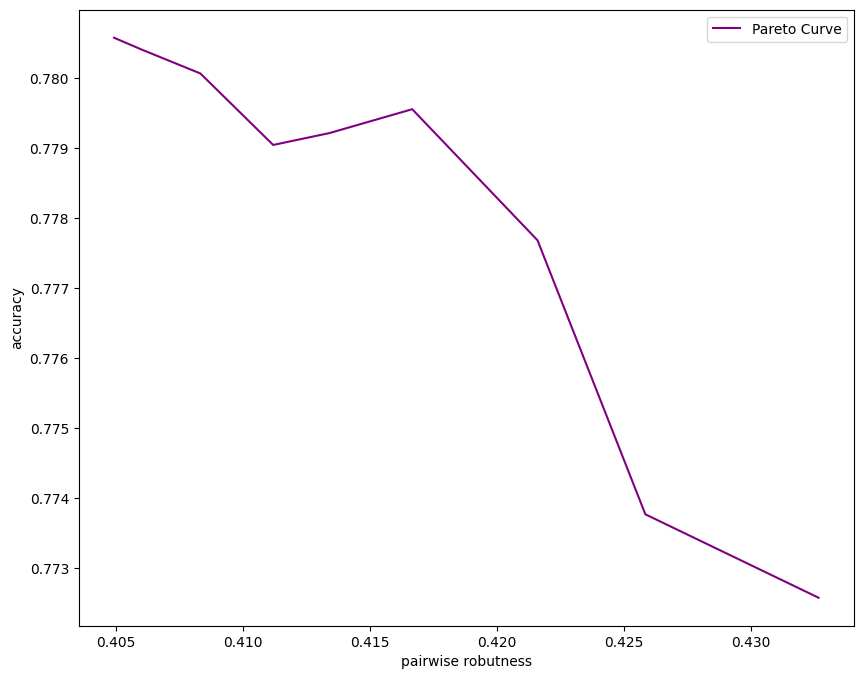

In [16]:
visualize_2d_results("exp36",  labels=["accuracy", "pairwise robutness"]) 

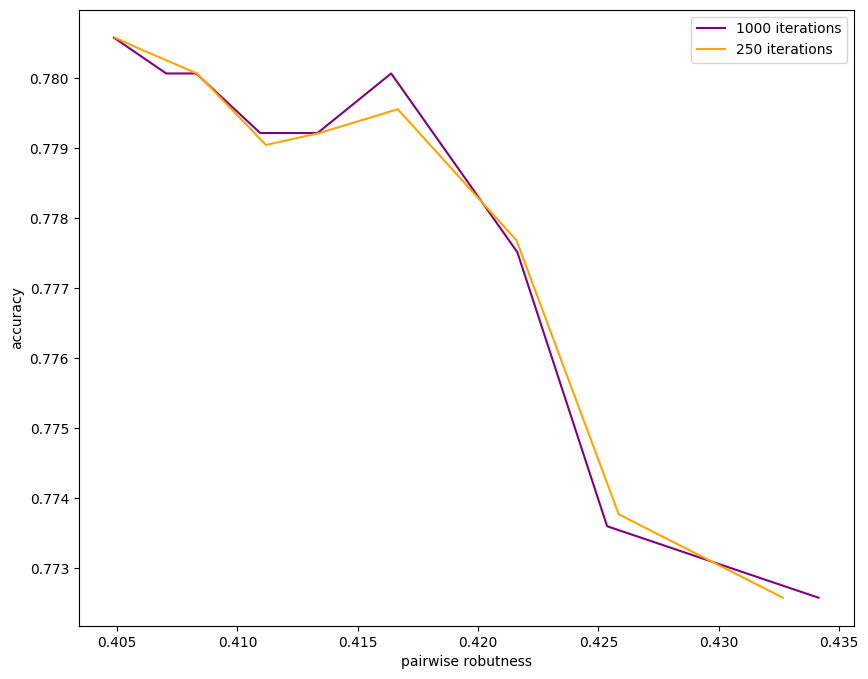

In [17]:
compare_experiments_2d("exp35", "exp36", labels=["accuracy", "pairwise robutness"],
                       dataset_labels = ["1000 iterations", "250 iterations"])

## Experiment 37 (acc vs pairwise robustness, grid_sz = 30)

In [18]:
print_exp_info("exp37")

name:::exp35
descr:::torch acc vs consistent robustness 250 epochs 4096 batch size
result#0:::[0.5926746129989624, 0.767632007598877, 0.7695059776306152, 0.7713798880577087, 0.77257239818573, 0.7730834484100342, 0.7734242081642151, 0.7742759585380554, 0.7752981185913086, 0.7764906287193298, 0.7778534889221191, 0.7785349488258362, 0.7792163491249084, 0.7797273993492126, 0.7790459990501404, 0.7788756489753723, 0.7787052989006042, 0.7790459990501404, 0.7787052989006042, 0.7790459990501404, 0.7790459990501404, 0.7790459990501404, 0.7802385091781616, 0.7802385091781616, 0.7800681591033936, 0.7795570492744446, 0.7798978090286255, 0.7800681591033936, 0.7802385091781616, 0.7800681591033936]
result#1:::[0.0, 0.4381771683692932, 0.4356672167778015, 0.43321406841278076, 0.4314139485359192, 0.4292845129966736, 0.4280068278312683, 0.42476433515548706, 0.4233560562133789, 0.42182284593582153, 0.42073822021484375, 0.419352650642395, 0.4183077812194824, 0.41687679290771484, 0.4162180423736572, 0.41445

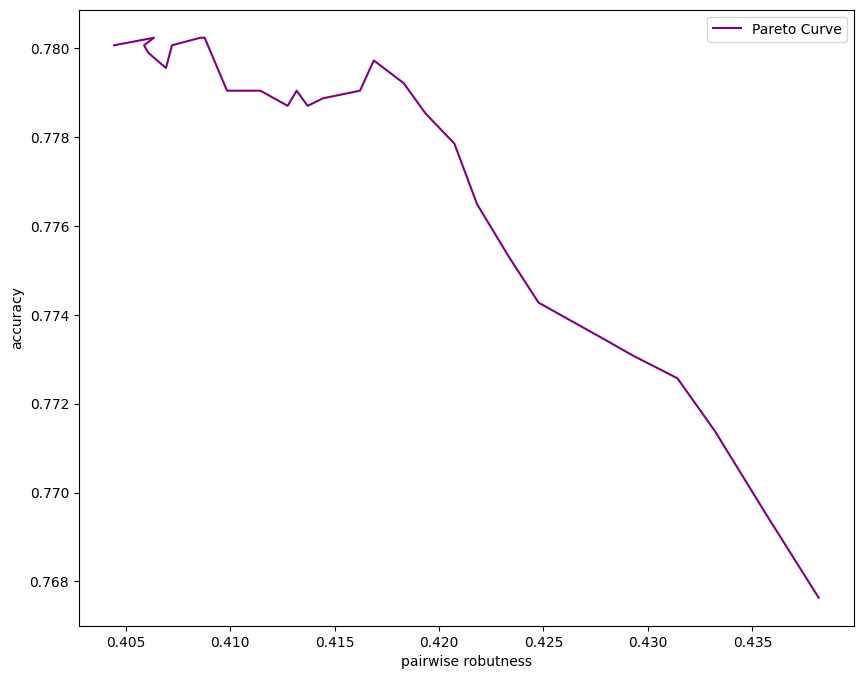

In [19]:
visualize_2d_results("exp37",  labels=["accuracy", "pairwise robutness"]) 

## Experiment 38 (acc vs pairwise robustness, grid_sz = 30, n_folds=3)

In [20]:
print_exp_info("exp38")

name:::exp38
descr:::torch acc vs consistent robustness 250 epochs 4096 batch size, n_fold=3
result#0:::[0.591368556022644, 0.7686541676521301, 0.7702441811561584, 0.772118091583252, 0.7730834484100342, 0.7736513614654541, 0.7741056084632874, 0.7743895649909973, 0.7758092284202576, 0.7759227752685547, 0.7770585417747498, 0.777796745300293, 0.7784214019775391, 0.7785348892211914, 0.7785348892211914, 0.7785916328430176, 0.7788188457489014, 0.7787052989006042, 0.7786484360694885, 0.7788188457489014, 0.7788188457489014, 0.7789891362190247, 0.7791595458984375, 0.7794435024261475, 0.7792730927467346, 0.7796139121055603, 0.7798409461975098, 0.7800681591033936, 0.7801249027252197, 0.7802384495735168]
result#1:::[0.0, 0.44833239912986755, 0.4454098045825958, 0.4425572454929352, 0.4400207996368408, 0.4380711615085602, 0.4355745017528534, 0.4341283142566681, 0.4324815273284912, 0.43091046810150146, 0.4292674958705902, 0.4283342659473419, 0.4265587329864502, 0.42504262924194336, 0.4241397082805633

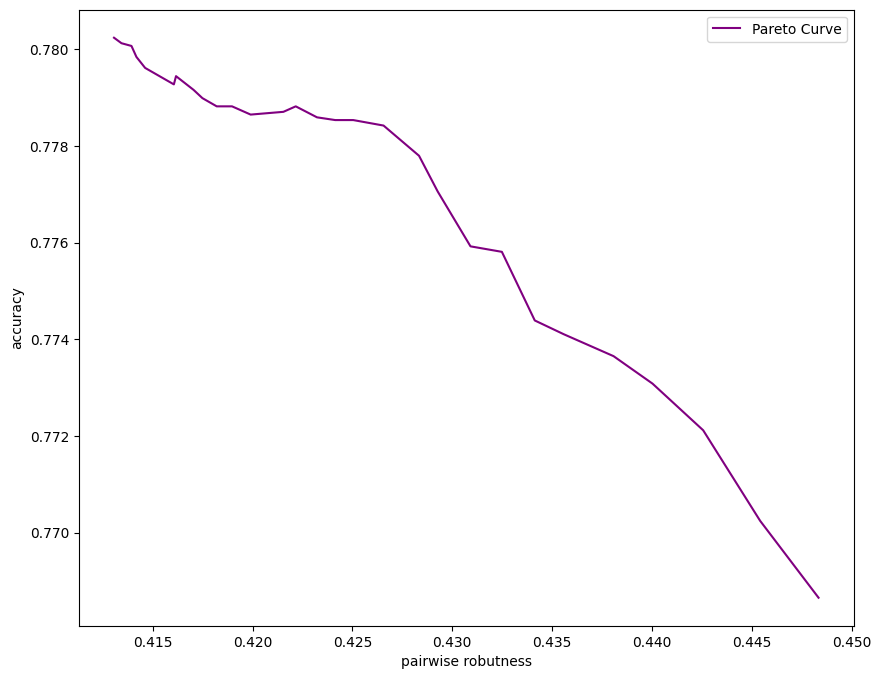

In [21]:
visualize_2d_results("exp38",  labels=["accuracy", "pairwise robutness"]) 

## Experiment 33 (acc vs adv robustness vs gr fairness)

In [40]:
print_exp_info("exp33", False)

name:::exp33
descr:::torch acc vs adv robustness vs group fairness


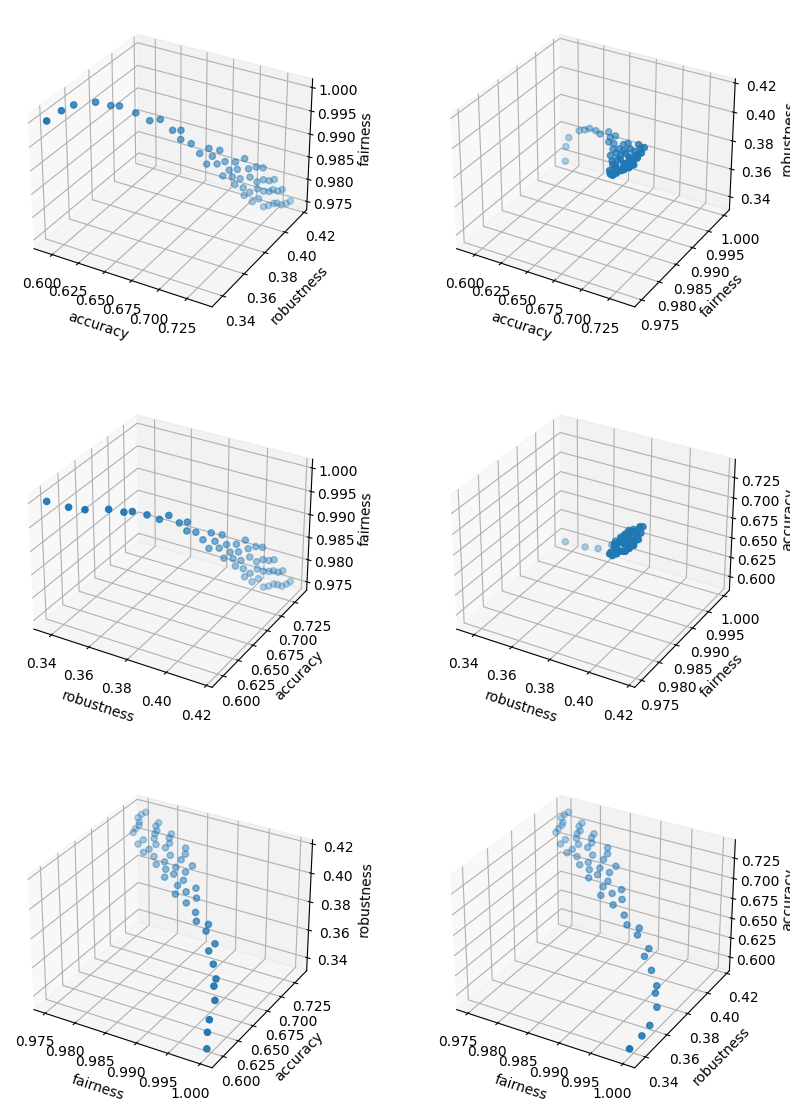

In [43]:
visualize_3d_results("exp33", mode='3D')

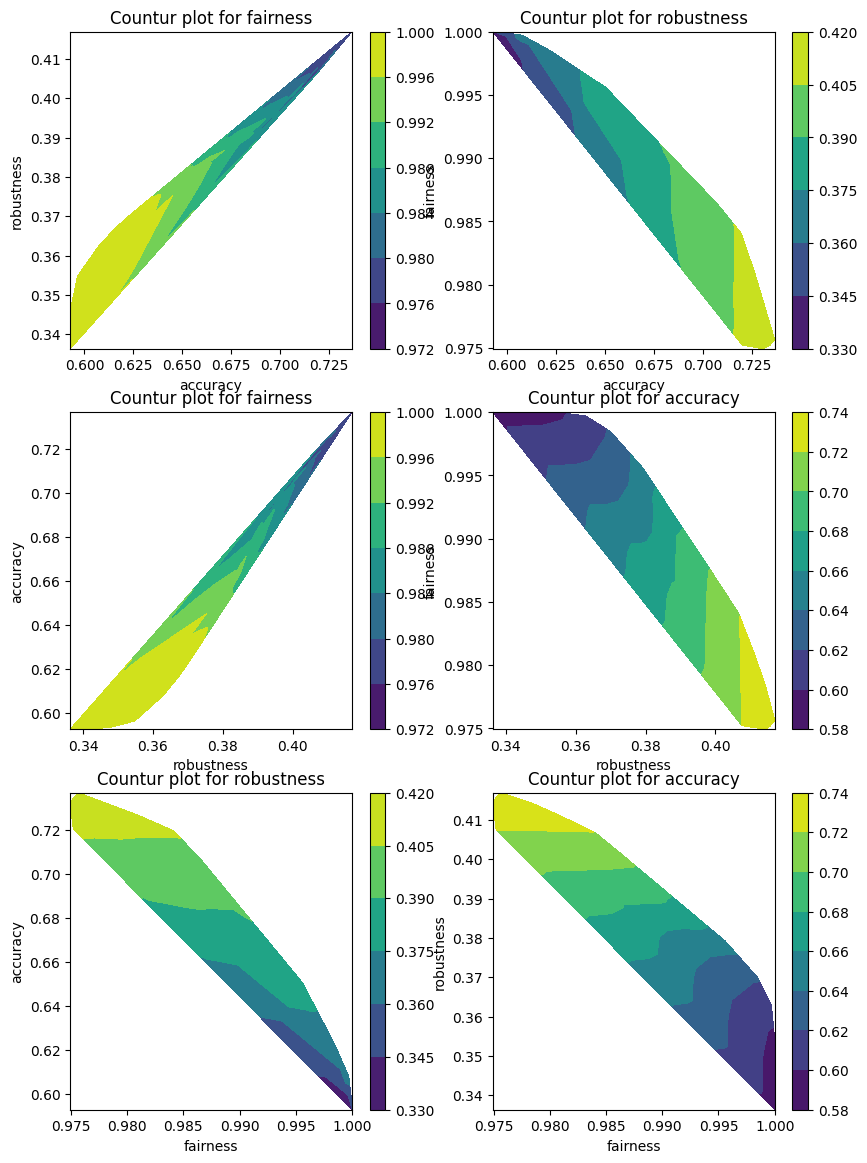

In [44]:
visualize_3d_results("exp33", mode='levels')

## Experiment 34 (acc vs ind fairness vs gr fairness)

In [45]:
print_exp_info("exp34", False)

name:::exp33
descr:::torch acc vs ind fairness vs group fairness


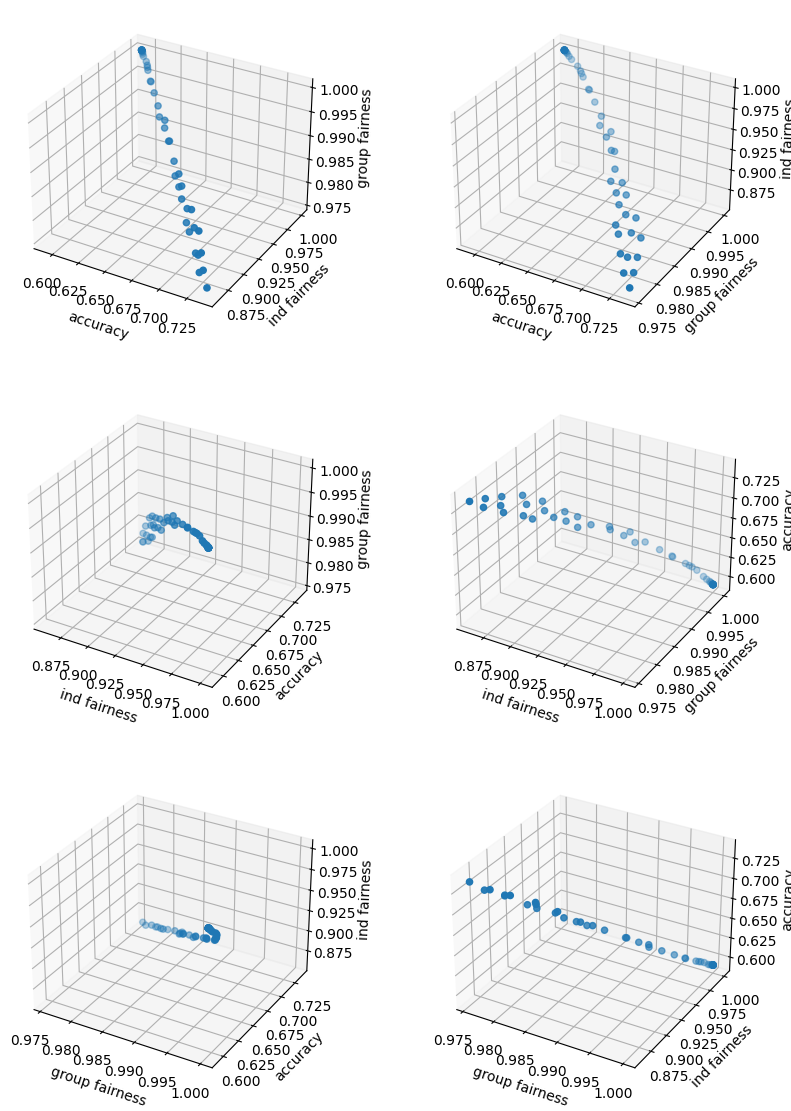

In [46]:
visualize_3d_results("exp34", labels=["accuracy", "ind fairness", "group fairness"],mode='3D')

# the line with low accuracy stands for 0 weight by accuracy

## Experiment 39 (acc vs l2 pairwise robustness vs gr fairness)

In [9]:
print_exp_info("exp39", False)

name:::exp33
descr:::torch acc vs adv robustness vs group fairness


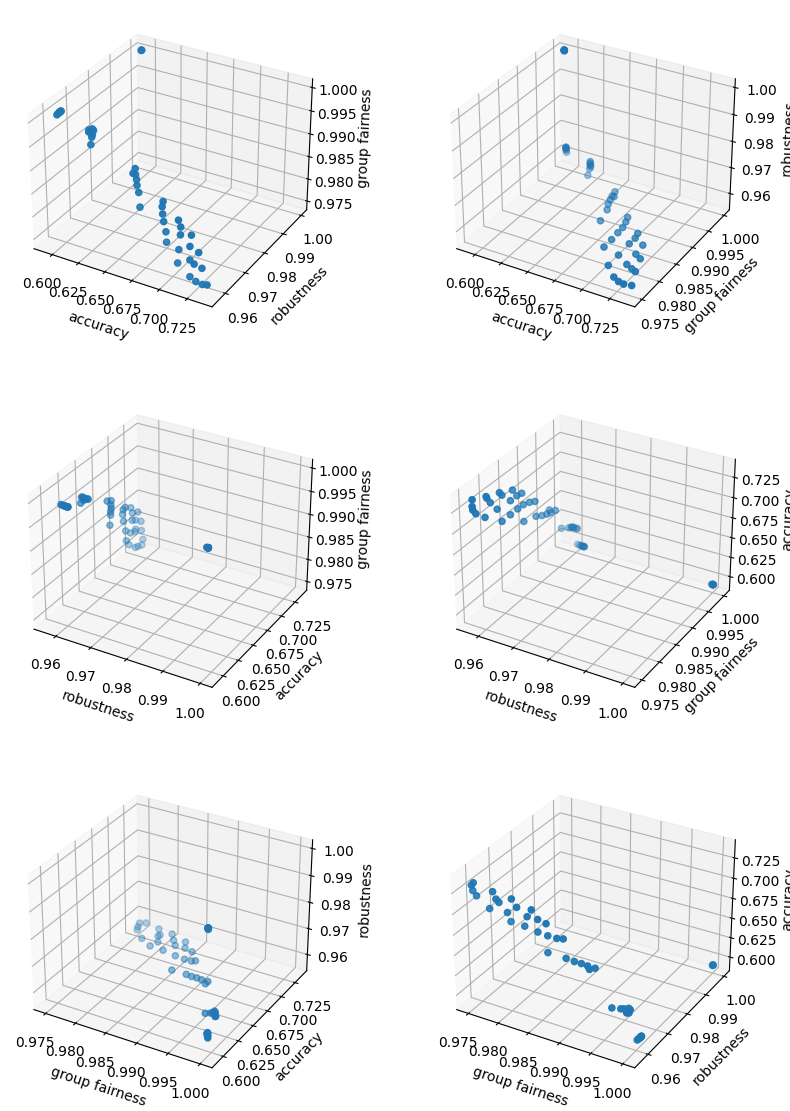

In [11]:
visualize_3d_results("exp39",  labels=["accuracy", "robustness", "group fairness"], 
                     mode='3D')